# Input files and data cleaning
First of all, we will designate the input and output directory for the source files. When we download the PubMed articles, the files were downloaded as .txt files. We will convert it into xlsx files for every cancer types.

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200

In [2]:
# Breast cancer
input_txt_breast_cancer = 'source_files_txt/breast_cancer.txt'
output_xlsx_breast_cancer = 'source_files_xlsx/breast_cancer.xlsx'

# lung cancer
input_txt_lung_cancer = 'source_files_txt/lung_cancer.txt'
output_xlsx_lung_cancer = 'source_files_xlsx/lung_cancer.xlsx'

# Colorectal cancer
input_txt_colorectal_cancer = 'source_files_txt/colorectal_cancer.txt'
output_xlsx_colorectal_cancer = 'source_files_xlsx/colorectal_cancer.xlsx'

# Prostate cancer
input_txt_prostate_cancer = 'source_files_txt/prostate_cancer.txt'
output_xlsx_prostate_cancer = 'source_files_xlsx/prostate_cancer.xlsx'

# Stomach cancer
input_txt_stomach_cancer = 'source_files_txt/stomach_cancer.txt'
output_xlsx_stomach_cancer = 'source_files_xlsx/stomach_cancer.xlsx'

# Liver cancer
input_txt_liver_cancer = 'source_files_txt/liver_cancer.txt'
output_xlsx_liver_cancer = 'source_files_xlsx/liver_cancer.xlsx'

# Cervix cancer
input_txt_cervix_cancer = 'source_files_txt/cervix_cancer.txt'
output_xlsx_cervix_cancer = 'source_files_xlsx/cervix_cancer.xlsx'

# Oesophagus cancer
input_txt_oesophagus_cancer = 'source_files_txt/oesophagus_cancer.txt'
output_xlsx_oesophagus_cancer = 'source_files_xlsx/oesophagus_cancer.xlsx'

# Thyroid cancer
input_txt_thyroid_cancer = 'source_files_txt/thyroid_cancer.txt'
output_xlsx_thyroid_cancer = 'source_files_xlsx/thyroid_cancer.xlsx'

# Bladder cancer
input_txt_bladder_cancer = 'source_files_txt/bladder_cancer.txt'
output_xlsx_bladder_cancer = 'source_files_xlsx/bladder_cancer.xlsx'

input_txt_files = [
    input_txt_breast_cancer, input_txt_lung_cancer, input_txt_colorectal_cancer, input_txt_prostate_cancer,
    input_txt_stomach_cancer, input_txt_liver_cancer, input_txt_cervix_cancer, input_txt_oesophagus_cancer,
    input_txt_thyroid_cancer, input_txt_bladder_cancer
]

output_xlsx_files = [
    output_xlsx_breast_cancer, output_xlsx_lung_cancer, output_xlsx_colorectal_cancer, output_xlsx_prostate_cancer,
    output_xlsx_stomach_cancer, output_xlsx_liver_cancer, output_xlsx_cervix_cancer, output_xlsx_oesophagus_cancer,
    output_xlsx_thyroid_cancer, output_xlsx_bladder_cancer
]

In [3]:
PMID_index_list_of_list = []
lines_array = []

for input_file in input_txt_files:
    PMID_index_list = []
    with open(input_file, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    lines_array.append(lines)
    
    article_count = 0
    index = 0
    
    for line in lines:
        if line.startswith('PMID'):
            PMID_index_list.append(index)
            article_count += 1
        index +=1
    PMID_index_list.append(index)
    PMID_index_list_of_list.append(PMID_index_list)
    
    print(input_file)
    print(f"the number of articles in {input_file} is {article_count}\n")

source_files_txt/breast_cancer.txt
the number of articles in source_files_txt/breast_cancer.txt is 10000

source_files_txt/lung_cancer.txt
the number of articles in source_files_txt/lung_cancer.txt is 10000

source_files_txt/colorectal_cancer.txt
the number of articles in source_files_txt/colorectal_cancer.txt is 10000

source_files_txt/prostate_cancer.txt
the number of articles in source_files_txt/prostate_cancer.txt is 10000

source_files_txt/stomach_cancer.txt
the number of articles in source_files_txt/stomach_cancer.txt is 10000

source_files_txt/liver_cancer.txt
the number of articles in source_files_txt/liver_cancer.txt is 10000

source_files_txt/cervix_cancer.txt
the number of articles in source_files_txt/cervix_cancer.txt is 10000

source_files_txt/oesophagus_cancer.txt
the number of articles in source_files_txt/oesophagus_cancer.txt is 10000

source_files_txt/thyroid_cancer.txt
the number of articles in source_files_txt/thyroid_cancer.txt is 10000

source_files_txt/bladder_can

In [4]:
articles_list_of_list = []
for one_cancer_type in range(len(PMID_index_list_of_list)):
    articles_list = []
    for i in range(article_count):
        for one_line in range(PMID_index_list_of_list[one_cancer_type][i], PMID_index_list_of_list[one_cancer_type][i+1]):
            articles_list.append(lines_array[one_cancer_type][one_line])
    articles_list_of_list.append(articles_list)

In [5]:
PMID_list_of_list = []
TI_list_of_list = []
AB_list_of_list = []

for one_articles_list in articles_list_of_list:
    current_line = 0
    PMID_list = []
    AB_list = []
    TI_list = []
    while current_line < len(one_articles_list):
        if one_articles_list[current_line].startswith('PMID'):
            PMID = one_articles_list[current_line].split('- ')
            PMID_list.append(PMID[1].strip())
            current_line += 1
        elif one_articles_list[current_line].startswith('TI'):
            TI = one_articles_list[current_line][6:-1].strip()
            while one_articles_list[current_line+1].startswith('    '):
                next_line = one_articles_list[current_line+1].strip()
                TI = TI + ' ' + next_line
                current_line += 1
            TI_list.append(TI)
        elif one_articles_list[current_line].startswith('AB'):
            AB = one_articles_list[current_line][6:-1].strip()
            while one_articles_list[current_line+1].startswith('    '):
                next_line = one_articles_list[current_line+1].strip()
                AB = AB + ' ' + next_line
                current_line += 1
            AB_list.append(AB)
        current_line += 1
    
    PMID_list_of_list.append(PMID_list)
    TI_list_of_list.append(TI_list)
    AB_list_of_list.append(AB_list)

In [6]:
import pandas as pd
from itertools import zip_longest

cancer_types = ["Breast", "Lung", "Colorectal", "Prostate", "Stomach", "Liver", "Cervix", "Oesophagus", "Thyroid", "Bladder"]

for i in range(len(cancer_types)):
    pmid_list = PMID_list_of_list[i]
    ti_list = TI_list_of_list[i]
    ab_list = AB_list_of_list[i]
    
    zipped_data = list(zip_longest(pmid_list, ti_list, ab_list, fillvalue=None))
    
    pmid_list, ti_list, ab_list = zip(*zipped_data)

    data = {
        'PMID': pmid_list,
        'TI': ti_list,
        'AB': ab_list,
        'Type': [cancer_types[i]] * len(pmid_list)
    }
    df = pd.DataFrame(data)

    df.to_excel(output_xlsx_files[i], index=False)
    print(f"Saved data for {cancer_types[i]} cancer to {output_xlsx_files[i]}")

Saved data for Breast cancer to source_files_xlsx/breast_cancer.xlsx
Saved data for Lung cancer to source_files_xlsx/lung_cancer.xlsx
Saved data for Colorectal cancer to source_files_xlsx/colorectal_cancer.xlsx
Saved data for Prostate cancer to source_files_xlsx/prostate_cancer.xlsx
Saved data for Stomach cancer to source_files_xlsx/stomach_cancer.xlsx
Saved data for Liver cancer to source_files_xlsx/liver_cancer.xlsx
Saved data for Cervix cancer to source_files_xlsx/cervix_cancer.xlsx
Saved data for Oesophagus cancer to source_files_xlsx/oesophagus_cancer.xlsx
Saved data for Thyroid cancer to source_files_xlsx/thyroid_cancer.xlsx
Saved data for Bladder cancer to source_files_xlsx/bladder_cancer.xlsx


# Tokenization
Here, we start to convert sequence of texts into tokens. We start with a dictionary with cancer types as the keys. Then, we will create Token Distribution plot figures using matplotlib and save it in a separate folder.

In [7]:
tokens_by_type = {}

dataframes = []

for file_path in output_xlsx_files:
    df = pd.read_excel(file_path, index_col=None)
    dataframes.append(df)

for i in range(len(dataframes)):
    dataframes[i]["TI_AB"] = dataframes[i]["TI"].astype(str) + dataframes[i]["AB"].astype(str)

for i in range(len(dataframes)):
    cancer_type = dataframes[i]['Type'].unique()[0]
    tokens_by_type[cancer_type] = [article.split() for article in dataframes[i]['TI_AB']]

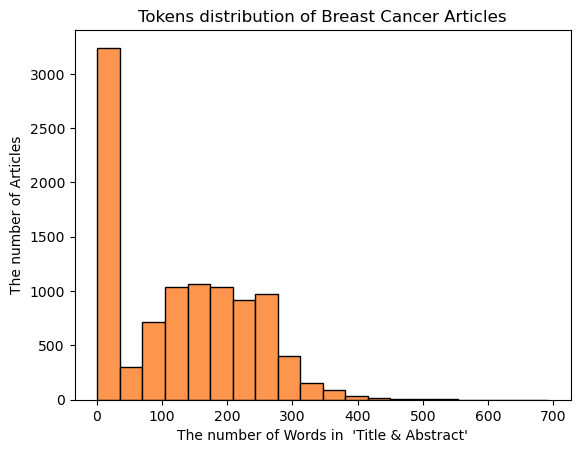

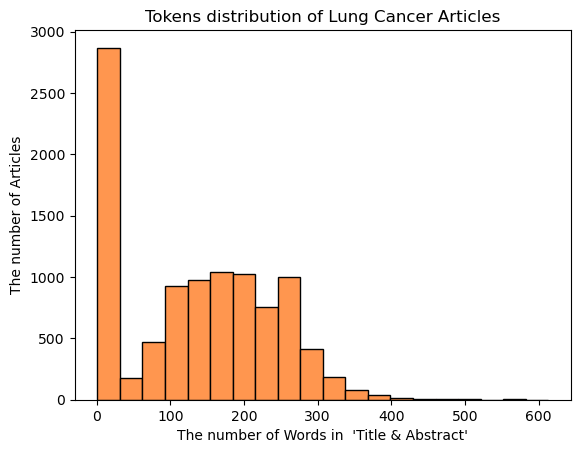

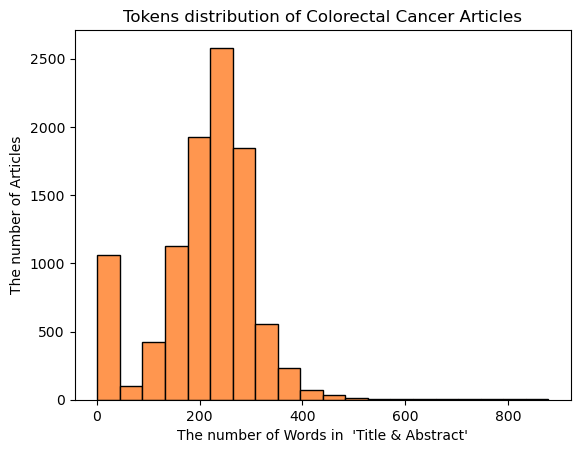

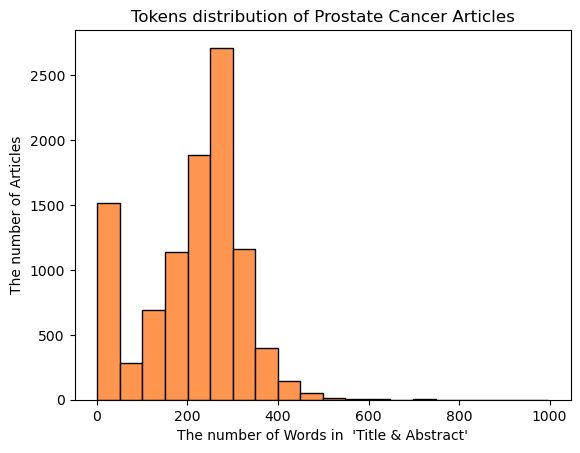

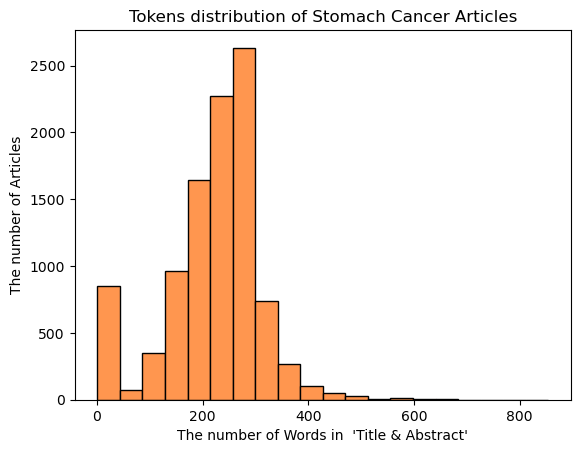

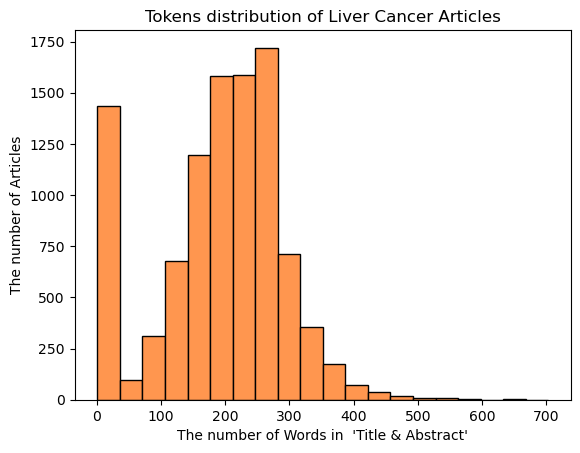

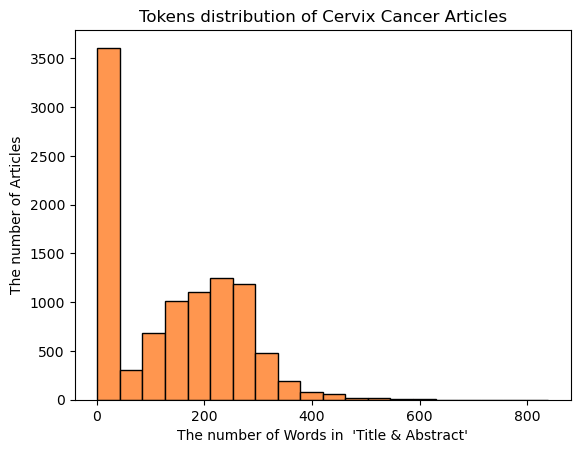

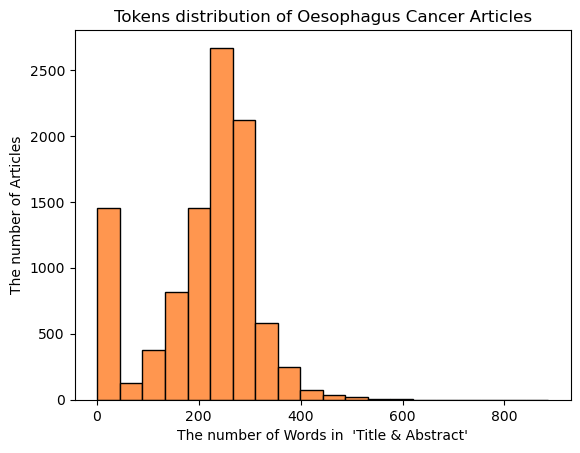

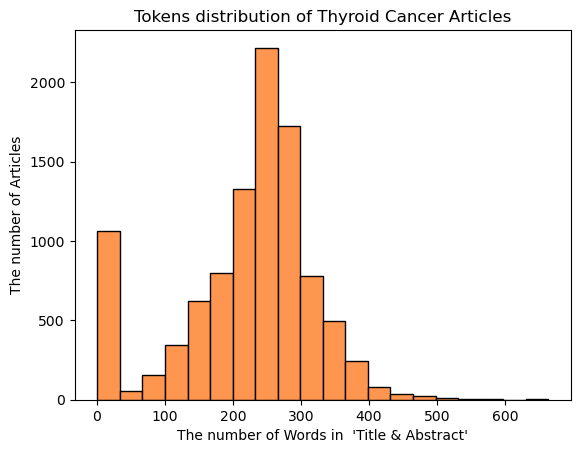

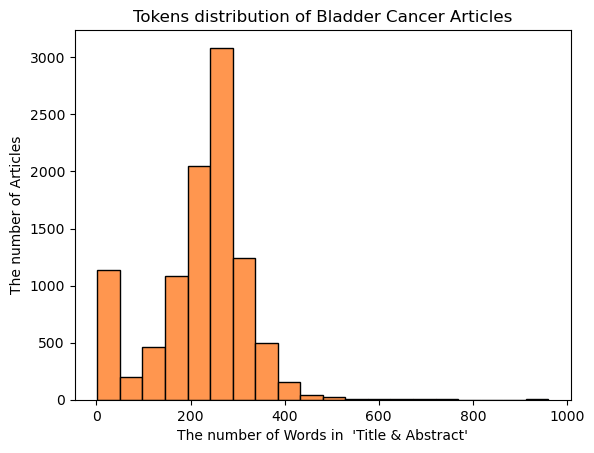

In [8]:
# HISTOGRAM

import matplotlib.pyplot as plt

for cancer_type in tokens_by_type.keys():
    tokens_distribution = [len(token) for token in tokens_by_type[cancer_type]]

    plt.hist(tokens_distribution, bins = 20, color = 'xkcd:pastel orange', edgecolor = 'black')
    plt.title(f"Tokens distribution of {cancer_type} Cancer Articles")
    plt.xlabel("The number of Words in  'Title & Abstract'")
    plt.ylabel("The number of Articles")

    plt.savefig(f'./figures/{cancer_type}_number_of_tokens_TI_AB.png')
    plt.show()

based on the cancer type, we filter the token. We created 2 versions. The first one combines all tokens in all cancer types, while the 2nd one combines all tokens for each cancer type. The same one goes for subsequent cells (lower, stopwords, and lemmatization)

In [9]:
import re

filtered_tokens = []

for cancer_type in tokens_by_type.keys():
    filtered_tokens += list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for token in tokens_by_type[cancer_type] for word in token]))

filtered_tokens_by_type = {}

for cancer_type in tokens_by_type.keys():
    filtered_tokens_by_type[cancer_type] = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for token in tokens_by_type[cancer_type] for word in token]))

In [10]:
import nltk

stopwords = nltk.corpus.stopwords.words('English')

filtered_tokens_lower = [token.lower() for token in filtered_tokens]
filtered_tokens_nostopwords = [token for token in filtered_tokens_lower if token not in stopwords]


filtered_tokens_by_type_lower = {}
filtered_tokens_by_type_nostopwords = {}

for cancer_type in filtered_tokens_by_type.keys():

    filtered_tokens_by_type_lower[cancer_type] = [token.lower() for token in filtered_tokens_by_type[cancer_type]]
    filtered_tokens_by_type_nostopwords[cancer_type] = [token for token in filtered_tokens_by_type_lower[cancer_type] if token not in stopwords]

In [11]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

tokens_lemmatized = [lemmatizer.lemmatize(token) for token in filtered_tokens_nostopwords]

tokens_lemmatized_by_type = {}

for cancer_type in filtered_tokens_by_type_nostopwords.keys():
    tokens_lemmatized_by_type[cancer_type] = [lemmatizer.lemmatize(token) for token in filtered_tokens_by_type_nostopwords[cancer_type]]

In [12]:
merged_df = pd.concat(dataframes)

In [13]:
merged_df['Type'].head

<bound method NDFrame.head of 0        Breast
1        Breast
2        Breast
3        Breast
4        Breast
         ...   
9995    Bladder
9996    Bladder
9997    Bladder
9998    Bladder
9999    Bladder
Name: Type, Length: 100000, dtype: object>

In [14]:
only_articles = merged_df['TI_AB'].tolist()

In [15]:
wpt = nltk.WordPunctTokenizer()

# removes special characters/trailing whitespaces, lowercases the words, tokenizes, 
# filters stopwords, and re-joined the tokens into articles
def normalize_document(doc):
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    doc = doc.lower()
    doc = doc.strip()
    tokens_wpt = wpt.tokenize(doc)
    filtered_tokens_wpt = [token for token in tokens_wpt if token not in stopwords]
    doc = ' '.join(filtered_tokens_wpt)
    return doc

normalize_articles = np.vectorize(normalize_document)
normalized_only_articles = normalize_articles(only_articles)

**Bag of Words (BOW)** is a technique in natural language processing (NLP) used to represent text data as numerical feature vectors. It involves creating a vocabulary of unique words in the text corpus. Each document in the corpus is then represented as a vector where each dimension corresponds to a word in the vocabulary, and the value in each dimension represents the frequency of that word in the document.

**a sparse matrix** where most of the elements are zero. In other words, it is a matrix with a large number of zero-valued elements relative to the total number of elements. Sparse matrices are used to efficiently represent and store data when the majority of elements are zero, which is common in many real-world datasets, including text data.

**CountVectorizer** is a class provided by scikit-learn used for converting a collection of text documents into a matrix of token counts. CountVectorizer is a popular and convenient tool for creating BOW representations.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(normalized_only_articles)
print(cv_matrix.shape)
cv_matrix

(100000, 195219)


<100000x195219 sparse matrix of type '<class 'numpy.int64'>'
	with 8033464 stored elements in Compressed Sparse Row format>

In [17]:
cv = CountVectorizer(max_features=15000, min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(normalized_only_articles)
print(cv_matrix.shape)
cv_matrix

(100000, 15000)


<100000x15000 sparse matrix of type '<class 'numpy.int64'>'
	with 7581966 stored elements in Compressed Sparse Row format>

The dense representation is used when you want to convert a sparse matrix, like the one obtained from CountVectorizer, into a standard dense NumPy array (using *toarray* method). A dense representation stores every single element of the matrix, regardless of whether it's zero or not.

In [18]:
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [19]:
# get_feature_names_out() is a method provided by CountVectorizer to retrieve the feature names, 
# such as the unique words present in the corpus. 
# These feature names are extracted based on the vocabulary built during the fitting process.
vocab = cv.get_feature_names_out()
pd.DataFrame(cv_matrix, columns=vocab)

,00,000,0001,001,002,003,004,007,01,02,...,zinc,zip,zn,znf,znfas,zolbetuximab,zoledronic,zonal,zone,zones
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
print(len(vocab))
print(vocab)

15000
['00' '000' '0001' ... 'zonal' 'zone' 'zones']


# Training the data

In [21]:
corpus, target_names = (normalized_only_articles,  merged_df['Type'])

data_df = pd.DataFrame({'Article': corpus, 'Type': target_names})

print(data_df.shape)
data_df.head(5)

(100000, 2)


,Article,Type
0,breast cancer biology biomarkers treatmentsduring past recent years various therapies emerged era breast cancer breast cancer heterogeneous disease genetic environmental factors involved breast ca...,Breast
1,breast cancer presentation investigation managementbreast cancer common global malignancy leading cause cancer deaths despite undergraduate postgraduate exposure breast cancer limited impacting ab...,Breast
2,awareness current knowledge breast cancerbreast cancer remains worldwide public health dilemma currently common tumour globe awareness breast cancer public attentiveness advancement breast imaging...,Breast
3,review breast cancer pathologigcal image processingbreast cancer one common malignancies pathological image processing breast become important means early diagnosis breast cancer using medical ima...,Breast
4,primary secondary prevention breast cancerintroduction breast cancer common cancer among women second cancer frequently occurring worldwide newlydiagnosed cancers much evidence showing influence l...,Breast


In [22]:
from sklearn.model_selection import train_test_split

train_corpus, test_corpus, train_label_names, test_label_names =\
                                 train_test_split(np.array(data_df['Article']),
                                                       np.array(data_df['Type']), test_size=0.33, random_state=42)
train_corpus.shape, test_corpus.shape

((67000,), (33000,))

In [23]:
print(train_label_names[:5])
print(train_corpus[:5])

['Liver' 'Prostate' 'Breast' 'Liver' 'Thyroid']
['approach treatment colorectal liver metastasesnan'
 'prostate cancer invasion promoted mirpinduced ndrg deficiency nfb regulationbackground evidence suggests serum retinol level associated prostate cancer risk association genetic variants retinol metabolism pathway genes prostate cancer risk remains unclarified methods singlenucleotide polymorphisms snps genes retinol metabolism pathway genotyped evaluate association prostate cancer risk cases controls prostate lung colorectal ovarian plco cancer screening trial gene expression analysis evaluated using data gene expression omnibus geo datasets cancer genome atlas tcga database data genotypetissue expression gtex project dataset utilized perform expression quantitative trait loci eqtl analysis results two snps significantly associated prostate cancer risk rs aldha odds ratio confidence interval ci p rs aldha ci p moreover mrna level aldha significantly higher prostate cancer tissues norm

In [24]:
from collections import Counter

trd = dict(Counter(train_label_names))
tsd = dict(Counter(test_label_names))

(pd.DataFrame([[key, trd[key], tsd[key]] for key in trd], 
             columns=['Type', 'Train Count', 'Test Count'])
.sort_values(by=['Train Count', 'Test Count'],
             ascending=False))

,Type,Train Count,Test Count
4,Bladder,6733,3267
0,Liver,6726,3274
5,Colorectal,6726,3274
9,Lung,6726,3274
2,Breast,6720,3280
6,Cervix,6704,3296
8,Oesophagus,6698,3302
3,Thyroid,6673,3327
7,Stomach,6671,3329
1,Prostate,6623,3377


In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score

# build BOW features on train articles
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)
cv_train_features = cv.fit_transform(train_corpus)

print(cv_train_features.shape)
print(cv_train_features)

# transform test articles into features
cv_test_features = cv.transform(test_corpus)
print(cv_test_features.shape)
print(cv_test_features)

(67000, 153508)
  (0, 8553)	1
  (0, 142618)	1
  (0, 28226)	1
  (0, 76203)	1
  (0, 82585)	1
  (1, 28226)	1
  (1, 112715)	8
  (1, 17248)	9
  (1, 69398)	1
  (1, 112391)	1
  (1, 85556)	1
  (1, 91127)	1
  (1, 35434)	1
  (1, 92336)	1
  (1, 118704)	1
  (1, 46576)	1
  (1, 134220)	1
  (1, 126131)	1
  (1, 120581)	4
  (1, 74911)	2
  (1, 10105)	3
  (1, 121702)	5
  (1, 10112)	2
  (1, 54228)	2
  (1, 148494)	2
  :	:
  (66999, 118963)	1
  (66999, 98534)	1
  (66999, 35458)	2
  (66999, 44954)	1
  (66999, 12156)	1
  (66999, 118985)	1
  (66999, 28826)	1
  (66999, 112032)	1
  (66999, 58940)	1
  (66999, 69626)	1
  (66999, 73812)	1
  (66999, 151083)	1
  (66999, 29415)	1
  (66999, 23708)	1
  (66999, 1861)	1
  (66999, 5268)	1
  (66999, 48616)	1
  (66999, 33839)	1
  (66999, 109320)	1
  (66999, 36997)	1
  (66999, 112953)	1
  (66999, 94350)	1
  (66999, 40416)	1
  (66999, 144374)	1
  (66999, 102427)	1
(33000, 153508)
  (0, 2384)	1
  (0, 2705)	1
  (0, 3476)	1
  (0, 5327)	2
  (0, 6118)	1
  (0, 8336)	5
  (0, 8352)	1


In [27]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)

BOW model:> Train features shape: (67000, 153508)  Test features shape: (33000, 153508)


TF-IDF stands for Term Frequency-Inverse Document Frequency. It's a numerical statistic that reflects the importance of a word in a document relative to a collection of documents (corpus). TF-IDF is commonly used in information retrieval and text mining tasks, including text classification.

Term Frequency calculates (TF) how frequently a term (word) appears in a document.

Inverse Document Frequency (IDF) evaluates the importance of a word in the entire corpus.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# build TF-IDF features on train articles
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0)
tv_train_features = tv.fit_transform(train_corpus)
# transform test articles into features
tv_test_features = tv.transform(test_corpus)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

TFIDF model:> Train features shape: (67000, 153508)  Test features shape: (33000, 153508)


## Multinomial Naive Bayes Model
The Multinomial Naive Bayes model is a probabilistic classification algorithm based on Bayes' theorem, particularly suited for classification tasks with discrete features, such as word counts in text classification. Multinomial Naive Bayes predicts the likelihood of observing a feature (such as a word) given a class (such as a category) based on how often that feature appears in the training data for that class. It does this by referring to the probabilities learned during training. If a word appeared frequently in documents of a certain class during training, then the likelihood of observing that word in a new document of that class is considered high. Hence, Multinomial Naive Bayes models the joint probability of the input features and the class labels.

In [28]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB(alpha=1)
mnb.fit(cv_train_features, train_label_names)

mnb_bow_cv_scores = cross_val_score(mnb, cv_train_features, train_label_names, cv=5)

mnb_bow_cv_mean_score = np.mean(mnb_bow_cv_scores)
print('CV Accuracy (5-fold):', mnb_bow_cv_scores)
print('Mean CV Accuracy:', mnb_bow_cv_mean_score)
mnb_bow_test_score = mnb.score(cv_test_features, test_label_names)
print('Test Accuracy:', mnb_bow_test_score)

CV Accuracy (5-fold): [0.94097015 0.94268657 0.93932836 0.94268657 0.94059701]
Mean CV Accuracy: 0.9412537313432836
Test Accuracy: 0.942030303030303


In [38]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score

mnb = MultinomialNB(alpha=1)
mnb.fit(tv_train_features, train_label_names)
mnb_tfidf_cv_scores = cross_val_score(mnb, tv_train_features, train_label_names, cv=5)
mnb_tfidf_cv_mean_score = np.mean(mnb_tfidf_cv_scores)
print('CV Accuracy (5-fold):', mnb_tfidf_cv_scores)
print('Mean CV Accuracy:', mnb_tfidf_cv_mean_score)
mnb_tfidf_test_score = mnb.score(tv_test_features, test_label_names)
print('Test Accuracy:', mnb_tfidf_test_score)

CV Accuracy (5-fold): [0.92440299 0.92462687 0.92291045 0.9241791  0.92522388]
Mean CV Accuracy: 0.924268656716418
Test Accuracy: 0.9215757575757576


## Logistic Regression Model
Logistic Regression is a supervised machine learning algorithm used for binary classification tasks, where the target variable has two possible outcomes. It estimates the conditional probability of each class given the input features directly from the data. These probabilities can be interpreted as the likelihood of an instance belonging to a particular class. Hence, Logistic regression directly models the conditional probability of each class given the input features

In [29]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(cv_train_features, train_label_names)
lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_names, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
print('CV Accuracy (5-fold):', lr_bow_cv_scores)
print('Mean CV Accuracy:', lr_bow_cv_mean_score)
lr_bow_test_score = lr.score(cv_test_features, test_label_names)
print('Test Accuracy:', lr_bow_test_score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

CV Accuracy (5-fold): [0.98029851 0.97835821 0.97798507 0.97671642 0.97723881]
Mean CV Accuracy: 0.9781194029850747
Test Accuracy: 0.9788484848484849


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(tv_train_features, train_label_names)
lr_tfidf_cv_scores = cross_val_score(lr, tv_train_features, train_label_names, cv=5)
lr_tfidf_cv_mean_score = np.mean(lr_tfidf_cv_scores)
print('CV Accuracy (5-fold):', lr_tfidf_cv_scores)
print('Mean CV Accuracy:', lr_tfidf_cv_mean_score)
lr_tfidf_test_score = lr.score(tv_test_features, test_label_names)
print('Test Accuracy:', lr_tfidf_test_score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

CV Accuracy (5-fold): [0.98201493 0.98216418 0.98156716 0.98104478 0.98238806]
Mean CV Accuracy: 0.9818358208955225
Test Accuracy: 0.9822121212121212


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Stochastic Gradient Descent (SGD) Model
SGD is an optimization algorithm commonly used to train machine learning models. It works by iteratively updating the model parameters to minimize a loss function by taking small steps in the direction of the steepest decrease of the loss. In each iteration, SGD computes the gradient of the loss function with respect to the parameters using a subset of the training data (a single data point or a small batch), rather than the entire dataset, until it find the most optimal solution.

In [30]:
from sklearn.linear_model import SGDClassifier

svm_sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)
svm_sgd.fit(cv_train_features, train_label_names)
svmsgd_bow_cv_scores = cross_val_score(svm_sgd, cv_train_features, train_label_names, cv=5)
svmsgd_bow_cv_mean_score = np.mean(svmsgd_bow_cv_scores)
print('CV Accuracy (5-fold):', svmsgd_bow_cv_scores)
print('Mean CV Accuracy:', svmsgd_bow_cv_mean_score)
svmsgd_bow_test_score = svm_sgd.score(cv_test_features, test_label_names)
print('Test Accuracy:', svmsgd_bow_test_score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_mo

CV Accuracy (5-fold): [0.98007463 0.97910448 0.97895522 0.97656716 0.97723881]
Mean CV Accuracy: 0.9783880597014925
Test Accuracy: 0.9779696969696969


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [40]:
from sklearn.linear_model import SGDClassifier

svm_sgd = SGDClassifier(loss='hinge', penalty='l2', max_iter=5, random_state=42)
svm_sgd.fit(tv_train_features, train_label_names)
svmsgd_tfidf_cv_scores = cross_val_score(svm_sgd, tv_train_features, train_label_names, cv=5)
svmsgd_tfidf_cv_mean_score = np.mean(svmsgd_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svmsgd_tfidf_cv_scores)
print('Mean CV Accuracy:', svmsgd_tfidf_cv_mean_score)
svmsgd_tfidf_test_score = svm_sgd.score(tv_test_features, test_label_names)
print('Test Accuracy:', svmsgd_tfidf_test_score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_mo

CV Accuracy (5-fold): [0.98298507 0.9838806  0.98298507 0.98283582 0.98313433]
Mean CV Accuracy: 0.9831641791044776
Test Accuracy: 0.9826969696969697


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


## Random Forest Classifier Model
Random Forest is a versatile and powerful ensemble learning algorithm that can be used for both classification and regression tasks. At the core of Random Forest is the decision tree, which is a tree-like structure comprising nodes and branches.
Each internal node of the tree represents a decision based on the value of a feature, and each leaf node represents the output (class label for classification, or continuous value for regression). Random Forest builds multiple decision trees by randomly selecting subsets of the training data (with replacement) and a subset of the input features at each split point.
This process introduces randomness into the model, which helps reduce overfitting and improves generalization performance. The final prediction is determined by aggregating the individual predictions through a voting mechanism, where the class with the most votes (mode) across all trees is chosen.


*Ensemble learning is a machine learning technique that enhances accuracy and resilience in forecasting by merging predictions from multiple models*

In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(cv_train_features, train_label_names)
rfc_bow_cv_scores = cross_val_score(rfc, cv_train_features, train_label_names, cv=5)
rfc_bow_cv_mean_score = np.mean(rfc_bow_cv_scores)
print('CV Accuracy (5-fold):', rfc_bow_cv_scores)
print('Mean CV Accuracy:', rfc_bow_cv_mean_score)
rfc_bow_test_score = rfc.score(cv_test_features, test_label_names)
print('Test Accuracy:', rfc_bow_test_score)

CV Accuracy (5-fold): [0.88059701 0.87440299 0.88925373 0.88029851 0.88776119]
Mean CV Accuracy: 0.8824626865671643
Test Accuracy: 0.8899090909090909


In [41]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10, random_state=42)
rfc.fit(tv_train_features, train_label_names)
rfc_tfidf_cv_scores = cross_val_score(rfc, tv_train_features, train_label_names, cv=5)
rfc_tfidf_cv_mean_score = np.mean(rfc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', rfc_tfidf_cv_scores)
print('Mean CV Accuracy:', rfc_tfidf_cv_mean_score)
rfc_tfidf_test_score = rfc.score(tv_test_features, test_label_names)
print('Test Accuracy:', rfc_tfidf_test_score)

CV Accuracy (5-fold): [0.88492537 0.87440299 0.89895522 0.86231343 0.87910448]
Mean CV Accuracy: 0.8799402985074627
Test Accuracy: 0.8844848484848484


## Gradient Boosting Classifier Model
Gradient Boosting Classifier is a powerful machine learning algorithm that belongs to the ensemble learning family, similar to Random Forest. Unlike Random Forest, where trees are trained independently, Gradient Boosting builds trees in a sequential manner, with each tree learning from the mistakes of its predecessors. Gradient Boosting builds an ensemble of weak learners (typically decision trees) sequentially, with each subsequent learner aiming to correct the errors made by the previous ones. By iteratively adding weak learners, the ensemble gradually improves its performance on the training data.

*A "weak learner" refers to a simple model or algorithm that performs slightly better than random guessing on a classification or regression task. Weak learners are often used as building blocks in ensemble learning methods such as boosting.*

*The term "weak" doesn't imply that the model is inherently poor or ineffective. Instead, it indicates that the model's predictive power is limited, either because it's relatively simple or because it's trained on a subset of the data.*

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(cv_train_features, train_label_names)
gbc_bow_cv_scores = cross_val_score(gbc, cv_train_features, train_label_names, cv=5)
gbc_bow_cv_mean_score = np.mean(gbc_bow_cv_scores)
print('CV Accuracy (5-fold):', gbc_bow_cv_scores)
print('Mean CV Accuracy:', gbc_bow_cv_mean_score)
gbc_bow_test_score = gbc.score(cv_test_features, test_label_names)
print('Test Accuracy:', gbc_bow_test_score)

CV Accuracy (5-fold): [0.96858209 0.97141791 0.96619403 0.96529851 0.96977612]
Mean CV Accuracy: 0.9682537313432835
Test Accuracy: 0.9684545454545455


In [42]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=10, random_state=42)
gbc.fit(tv_train_features, train_label_names)
gbc_tfidf_cv_scores = cross_val_score(gbc, tv_train_features, train_label_names, cv=5)
gbc_tfidf_cv_mean_score = np.mean(gbc_tfidf_cv_scores)
print('CV Accuracy (5-fold):', gbc_tfidf_cv_scores)
print('Mean CV Accuracy:', gbc_tfidf_cv_mean_score)
gbc_tfidf_test_score = gbc.score(tv_test_features, test_label_names)
print('Test Accuracy:', gbc_tfidf_test_score)

CV Accuracy (5-fold): [0.97029851 0.96977612 0.9680597  0.96597015 0.96902985]
Mean CV Accuracy: 0.9686268656716418
Test Accuracy: 0.9691818181818181


## Linear Support Vector Classifier Model
A Linear Support Vector Classifier (Linear SVC) is a type of Support Vector Machine (SVM) specifically designed for linear classification tasks. SVM is a supervised learning algorithm used for classification and regression tasks. It works by finding the hyperplane that best separates the classes in the feature space. The best hyperplane is the one that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class (these points are called support vectors).

In [34]:
from sklearn.svm import LinearSVC

svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(cv_train_features, train_label_names)
svm_bow_cv_scores = cross_val_score(svm, cv_train_features, train_label_names, cv=5)
svm_bow_cv_mean_score = np.mean(svm_bow_cv_scores)
print('CV Accuracy (5-fold):', svm_bow_cv_scores)
print('Mean CV Accuracy:', svm_bow_cv_mean_score)
svm_bow_test_score = svm.score(cv_test_features, test_label_names)
print('Test Accuracy:', svm_bow_test_score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` expl

CV Accuracy (5-fold): [0.97708955 0.9761194  0.97589552 0.97395522 0.97485075]
Mean CV Accuracy: 0.9755820895522387
Test Accuracy: 0.9762121212121212


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [43]:
from sklearn.svm import LinearSVC

svm = LinearSVC(penalty='l2', C=1, random_state=42)
svm.fit(tv_train_features, train_label_names)
svm_tfidf_cv_scores = cross_val_score(svm, tv_train_features, train_label_names, cv=5)
svm_tfidf_cv_mean_score = np.mean(svm_tfidf_cv_scores)
print('CV Accuracy (5-fold):', svm_tfidf_cv_scores)
print('Mean CV Accuracy:', svm_tfidf_cv_mean_score)
svm_tfidf_test_score = svm.score(tv_test_features, test_label_names)
print('Test Accuracy:', svm_tfidf_test_score)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_clas

CV Accuracy (5-fold): [0.98216418 0.98246269 0.98171642 0.98156716 0.98283582]
Mean CV Accuracy: 0.9821492537313432
Test Accuracy: 0.9821212121212122


In [35]:
pd.DataFrame([['Naive Bayes', mnb_bow_cv_mean_score, mnb_bow_test_score],
              ['Logistic Regression', lr_bow_cv_mean_score, lr_bow_test_score],
              ['Linear SVM', svm_bow_cv_mean_score, svm_bow_test_score],
              ['Linear SVM (SGD)', svmsgd_bow_cv_mean_score, svmsgd_bow_test_score],
              ['Random Forest', rfc_bow_cv_mean_score, rfc_bow_test_score],
              ['Gradient Boosted Machines', gbc_bow_cv_mean_score, gbc_bow_test_score]],
             columns=['Model', 'CV Score (TF)', 'Test Score (TF)'],
             )

,Model,CV Score (TF),Test Score (TF)
0,Naive Bayes,0.941254,0.942030
1,Logistic Regression,0.978119,0.978848
2,Linear SVM,0.975582,0.976212
3,Linear SVM (SGD),0.978388,0.977970
4,Random Forest,0.882463,0.889909
5,Gradient Boosted Machines,0.968254,0.968455


In [36]:
pd.DataFrame([['Naive Bayes', mnb_bow_cv_mean_score, mnb_bow_test_score],
              ['Logistic Regression', lr_bow_cv_mean_score, lr_bow_test_score],
              ['Linear SVM', svm_bow_cv_mean_score, svm_bow_test_score],
              ['Linear SVM (SGD)', svmsgd_bow_cv_mean_score, svmsgd_bow_test_score],
              ['Random Forest', rfc_bow_cv_mean_score, rfc_bow_test_score],
              ['Gradient Boosted Machines', gbc_bow_cv_mean_score, gbc_bow_test_score]],
             columns=['Model', 'CV Score (TF)', 'Test Score (TF)'],
             ).T

,0,1,2,3,4,5
Model,Naive Bayes,Logistic Regression,Linear SVM,Linear SVM (SGD),Random Forest,Gradient Boosted Machines
CV Score (TF),0.941254,0.978119,0.975582,0.978388,0.882463,0.968254
Test Score (TF),0.94203,0.978848,0.976212,0.97797,0.889909,0.968455


In [44]:
pd.DataFrame([['Naive Bayes', 
               mnb_tfidf_cv_mean_score, mnb_tfidf_test_score],
              ['Logistic Regression', 
               lr_tfidf_cv_mean_score, lr_tfidf_test_score],
              ['Linear SVM', 
               svm_tfidf_cv_mean_score, svm_tfidf_test_score],
              ['Linear SVM (SGD)',  
               svmsgd_tfidf_cv_mean_score, svmsgd_tfidf_test_score],
              ['Random Forest', 
               rfc_tfidf_cv_mean_score, rfc_tfidf_test_score],
              ['Gradient Boosted Machines', 
               gbc_tfidf_cv_mean_score, gbc_tfidf_test_score]],
             columns=['Model',  'CV Score (TF-IDF)', 'Test Score (TF-IDF)'],
             )

,Model,CV Score (TF-IDF),Test Score (TF-IDF)
0,Naive Bayes,0.924269,0.921576
1,Logistic Regression,0.981836,0.982212
2,Linear SVM,0.982149,0.982121
3,Linear SVM (SGD),0.983164,0.982697
4,Random Forest,0.879940,0.884485
5,Gradient Boosted Machines,0.968627,0.969182
